In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df=pd.read_csv('uber-raw-data-may14.csv')

In [57]:
df.head()

,Date/Time,Lat,Lon,Base
0,5/1/2014 0:02:00,40.7521,-73.9914,B02512
1,5/1/2014 0:06:00,40.6965,-73.9715,B02512
2,5/1/2014 0:15:00,40.7464,-73.9838,B02512
3,5/1/2014 0:17:00,40.7463,-74.0011,B02512
4,5/1/2014 0:17:00,40.7594,-73.9734,B02512


In [58]:
df.shape

(652435, 4)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652435 entries, 0 to 652434
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  652435 non-null  object 
 1   Lat        652435 non-null  float64
 2   Lon        652435 non-null  float64
 3   Base       652435 non-null  object 
dtypes: float64(2), object(2)
memory usage: 19.9+ MB


no column has nan/null values.

In [60]:
df.describe()

,Lat,Lon
count,652435.000000,652435.000000
mean,40.740072,-73.975004
std,0.037537,0.054165
min,40.106700,-74.929000
25%,40.722400,-73.997000
50%,40.743300,-73.983900
75%,40.761400,-73.968100
max,41.322500,-72.180100


In [61]:
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

Simplifying "Date/Time" column

In [62]:
df['Date/Time']=pd.to_datetime(df['Date/Time'])

In [63]:
type(df['Date/Time']),type(df['Date/Time'][0])

(pandas.core.series.Series, pandas._libs.tslibs.timestamps.Timestamp)

In [64]:
df['month']=df['Date/Time'].dt.month

In [65]:
df['day']=df['Date/Time'].dt.day

In [66]:
df['hour']=df['Date/Time'].dt.hour

In [67]:
df['minute']=df['Date/Time'].dt.minute

In [68]:
df['weekday_name']=df['Date/Time'].dt.day_name()

In [71]:
df['week_no']=df['Date/Time'].dt.weekofyear

In [73]:
df['week_no']

0         18
1         18
2         18
3         18
4         18
          ..
652430    22
652431    22
652432    22
652433    22
652434    22
Name: week_no, Length: 652435, dtype: int64

In [74]:
df['week_no']=df['week_no']-17
df.week_no

0         1
1         1
2         1
3         1
4         1
         ..
652430    5
652431    5
652432    5
652433    5
652434    5
Name: week_no, Length: 652435, dtype: int64

In [75]:
del df['Date/Time']

In [76]:
df.head()

,Lat,Lon,Base,month,day,hour,minute,weekday_name,week_no
0,40.7521,-73.9914,B02512,5,1,0,2,Thursday,1
1,40.6965,-73.9715,B02512,5,1,0,6,Thursday,1
2,40.7464,-73.9838,B02512,5,1,0,15,Thursday,1
3,40.7463,-74.0011,B02512,5,1,0,17,Thursday,1
4,40.7594,-73.9734,B02512,5,1,0,17,Thursday,1


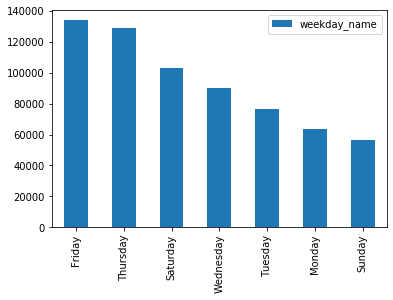

In [77]:
#Visualizing Data wrt weekday
#using dataframe.plot.bar functionality
pd.DataFrame(df.weekday_name.value_counts()).plot.bar()

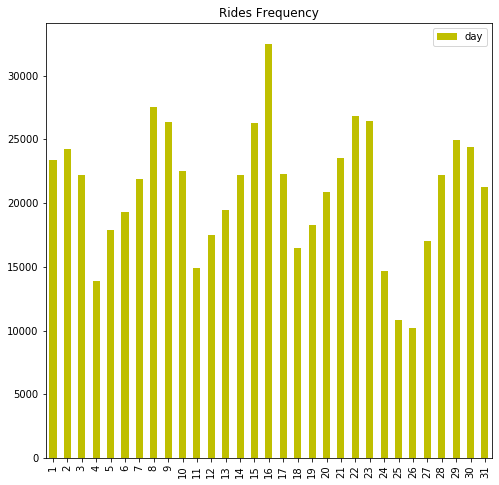

In [78]:
days_count_=pd.DataFrame(df.day.value_counts()).sort_index()
days_count_.plot(kind='bar',figsize=(8,8),title='Rides Frequency',
                 color='y',
                rot=90,fontsize=10)

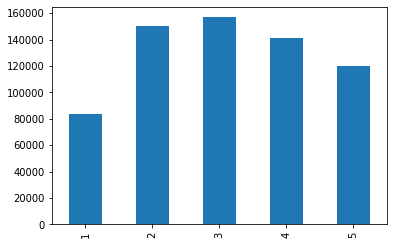

In [79]:
#visualizing rides frequency wrt week
week_counts=df.week_no.value_counts().sort_index()
# week_counts=df.groupby('week_no').count()
week_counts.plot.bar()

We see that demand picks up from second week, increases till third week and then decreases

In [82]:
#visualizing wrt weekdays and weekends
abc=pd.DataFrame(df.weekday_name.value_counts())
abc

,weekday_name
Friday,133991
Thursday,128921
Saturday,102990
Wednesday,89857
Tuesday,76662
Monday,63846
Sunday,56168


In [83]:
#wd for weekday and we for weekend
abc['Day_type']=['wd','wd','we','wd','wd','wd','we']

In [84]:
abc

,weekday_name,Day_type
Friday,133991,wd
Thursday,128921,wd
Saturday,102990,we
Wednesday,89857,wd
Tuesday,76662,wd
Monday,63846,wd
Sunday,56168,we


In [90]:
Uber_Holiday_or_not=abc.groupby('Day_type').sum()
Uber_Holiday_or_not

,weekday_name
Day_type,
wd,493277
we,159158


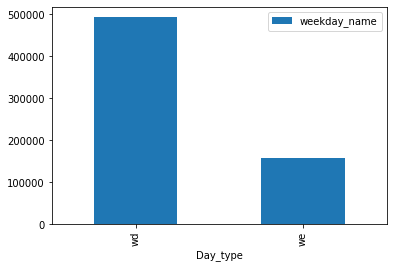

In [91]:
Uber_Holiday_or_not.plot.bar()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE00A1F7C8>],
      dtype=object)

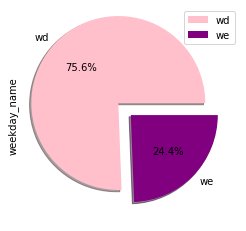

In [112]:
Uber_Holiday_or_not.plot.pie(subplots=True,shadow=True,colors=['pink','purple'],
                             explode=[0.2,0],autopct='%.1f%%')

The average rides on weekdays is higher than weekends

In [122]:
## Hour wise Analysis
Uber_hour=pd.DataFrame(df.hour.value_counts()).sort_index()
Uber_hour

,hour
0,13875
1,8186
2,5372
3,5946
4,6945
5,10789
6,21015
7,27413
8,25460
9,20507


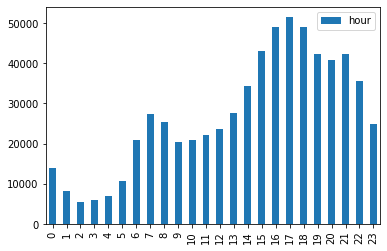

In [126]:
Uber_hour.plot.bar()

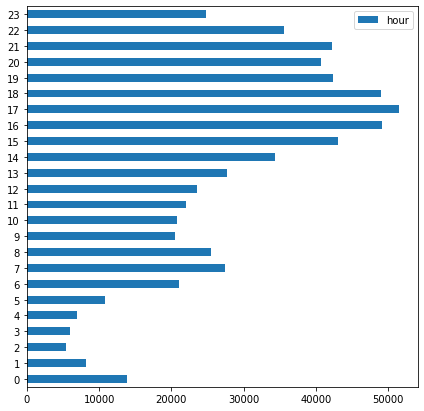

In [187]:
Uber_hour.plot(kind='barh',figsize=(7,7))

rides frequency is lowest in night and is at peak at 17:00 hours ie at office rush time

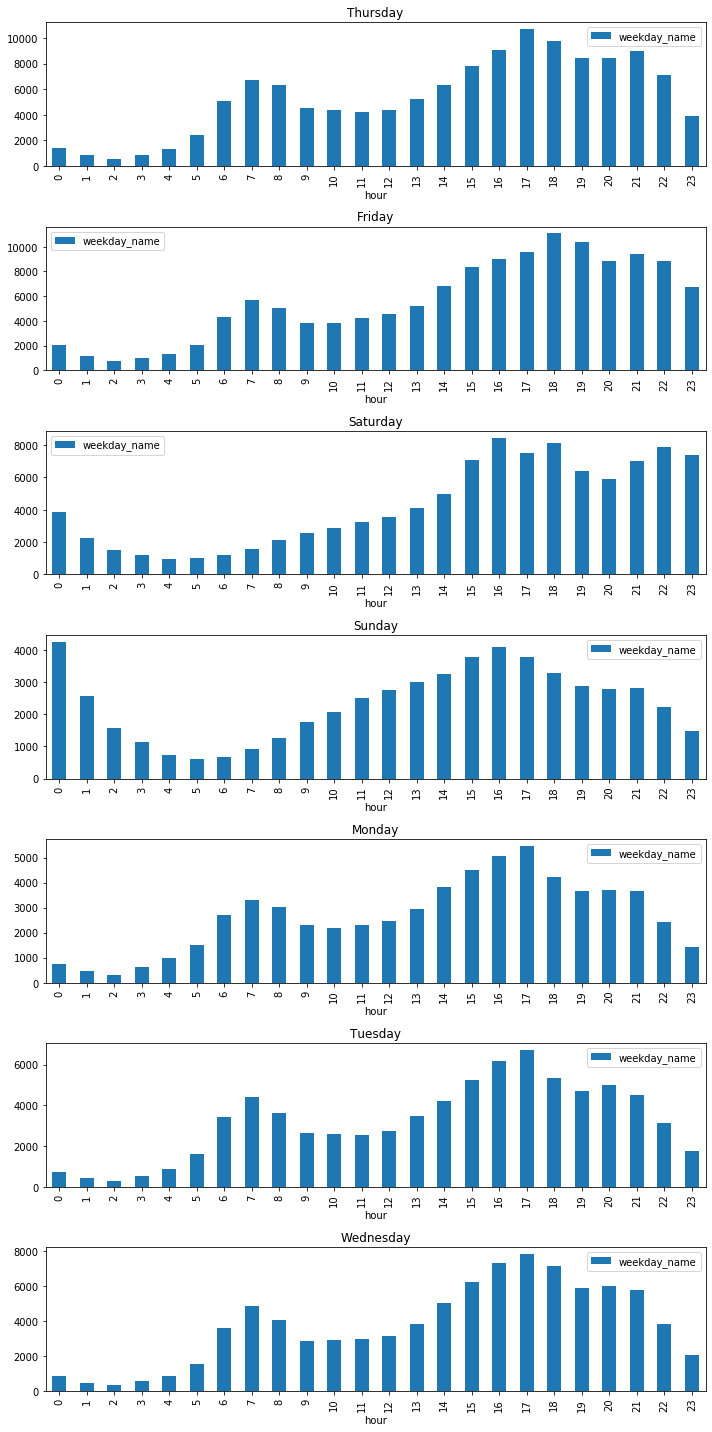

In [164]:
#hour by analysis wrt days
plt.figure(figsize=(10,20))
i=1
for days in df.weekday_name.unique():
    hour_vs_day=df[df['weekday_name']==days][['weekday_name','hour']]
    hour_vs_day=hour_vs_day.groupby('hour').count()
    plt.subplot(7,1,i)
    hour_vs_day.plot.bar(ax=plt.gca())
    plt.title(days)
    plt.tight_layout()
    i+=1

As we can see trend is same for all the days, max frequency of rides taken is in evening/office hours with peak rides at 17 hours

In [165]:
df.Base.unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

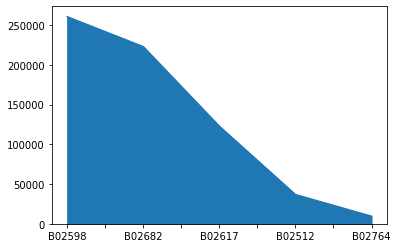

In [169]:
#analysis on basis of feature Base
Uber_base=df.Base.value_counts()
Uber_base.plot(kind='area')

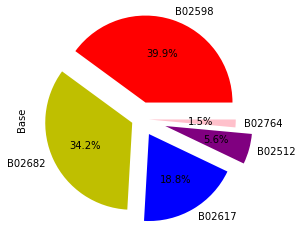

In [178]:
Uber_base.plot.pie(autopct="%.1f%%",explode=[.2,.1,.2,.3,.1],colors=['r','y','b','purple','pink'])

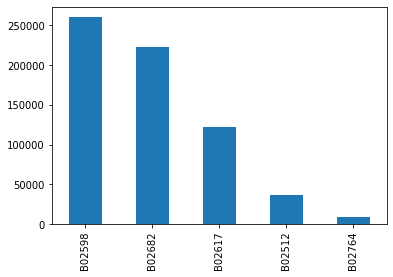

In [179]:
Uber_base.plot.bar()

As visible from all the plots majority of rides are taken from first three bases, with max rides taken from "B02598" base